# 1.Setup

Após a execução do script make_dataset.py, a base de train_processed foi criada para análises.

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
sns.set_palette('deep')

# 2.Carregamento da Base

In [98]:
df_casas = pd.read_csv(r'../data/processed/train_processed.csv')
df_casas.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NotAvailable,Reg,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotAvailable,Reg,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotAvailable,IR1,Lvl,AllPub,...,0,NotAvailable,NotAvailable,NotAvailable,0,12,2008,WD,Normal,250000


In [99]:
# dimensoes
df_casas.shape

(1459, 81)

In [100]:
# vou checar se os nulos foram realmente tratados corretamente
df_casas.isnull().sum()[df_casas.isnull().sum()>0]

Series([], dtype: int64)

Como temos muitas variáveis, irei separar o EDA em partes.

# 3.EDA

## 3.1.Variáveis Numéricas

In [101]:
# separando as variáveis numéricas
num_cols = df_casas.select_dtypes(['float', 'int']).drop(columns='Id').columns

# criando o df de variaveis numericas
df_casas_num = df_casas[num_cols]

In [102]:
display(df_casas_num.shape)
df_casas_num.head()

(1459, 37)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


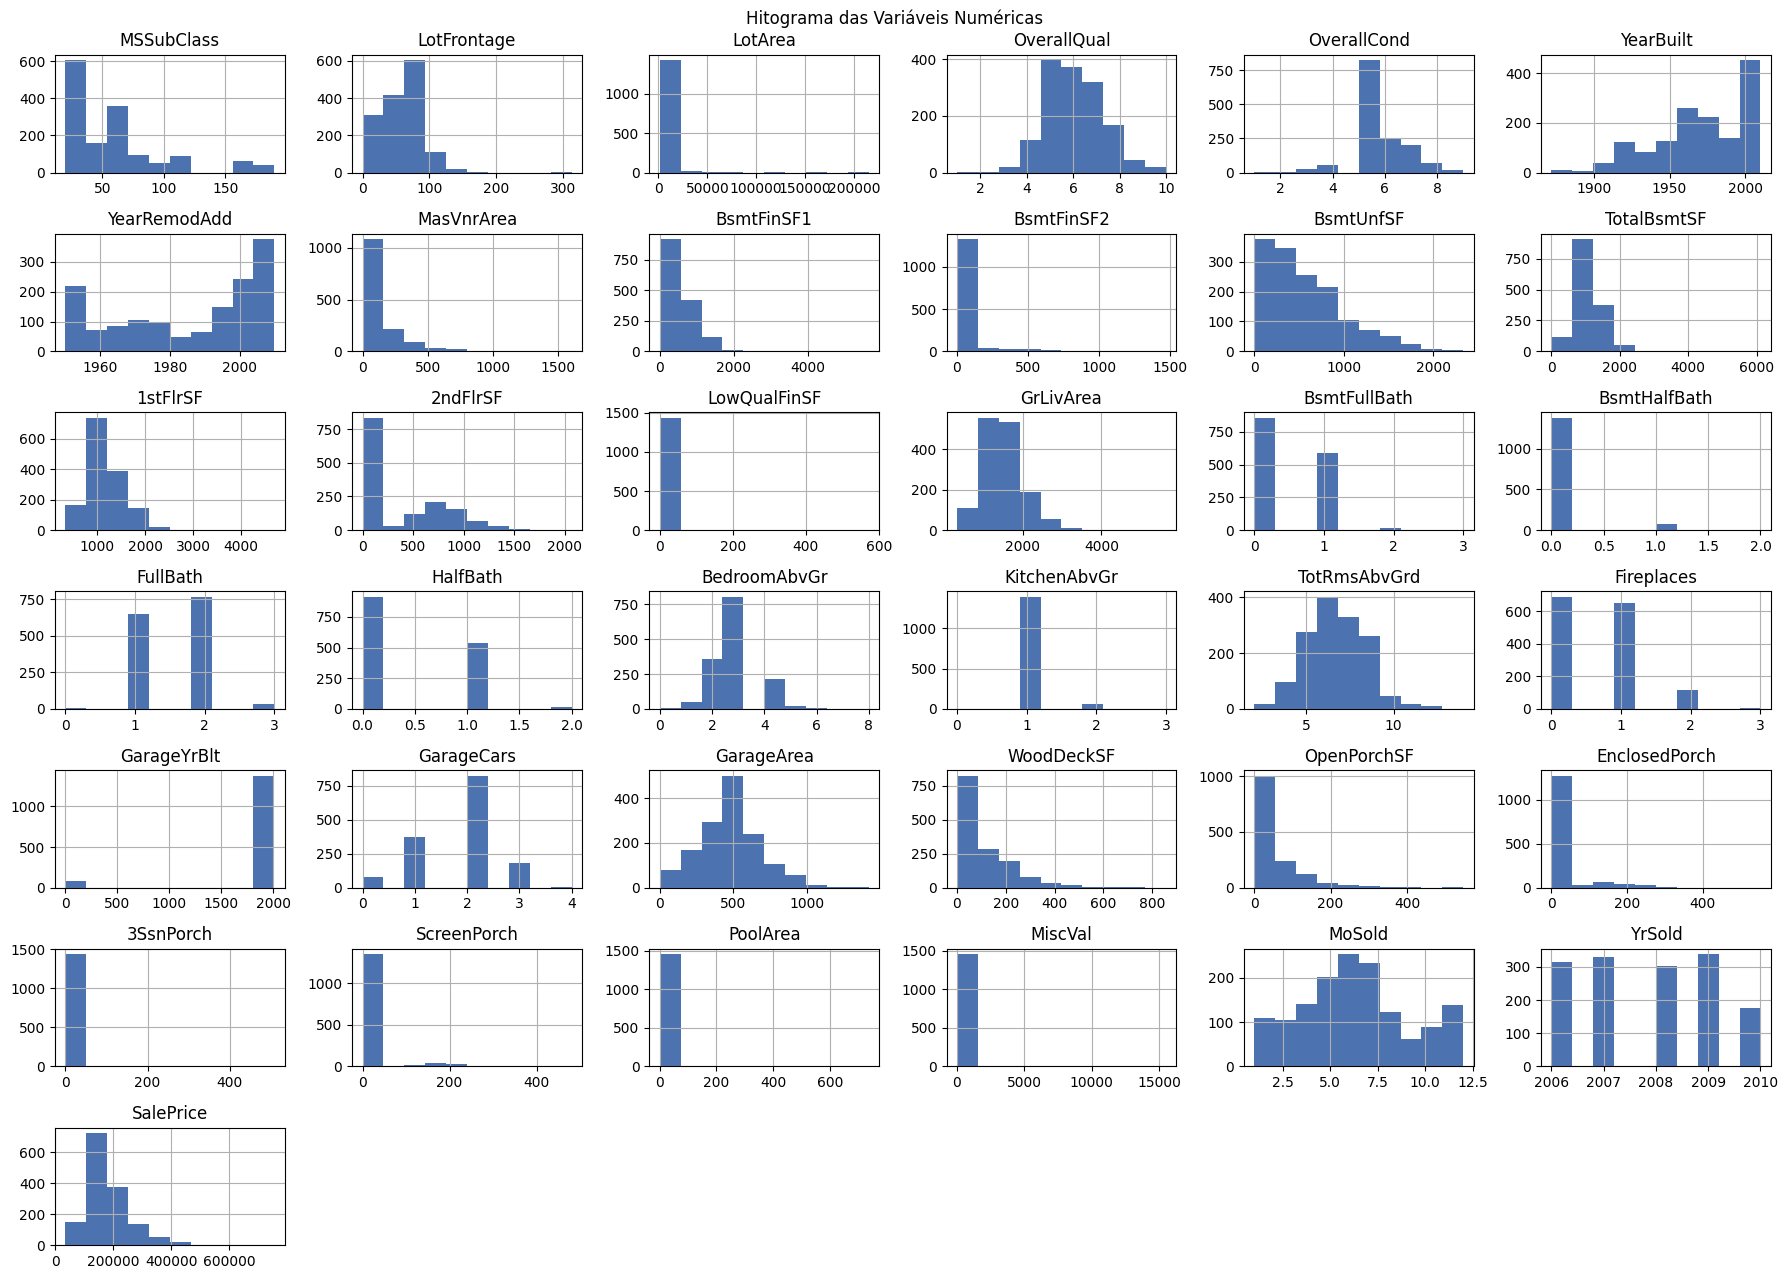

In [103]:
# observando a distribuição das variáveis numéricas
df_casas_num.hist(figsize=(18,13))
plt.gcf().suptitle('Hitograma das Variáveis Numéricas')
plt.tight_layout()
plt.show()

Algumas variáveis parecem seguir uma distribuição normal, inclusive nossa variável target **SalePrice**.

Essa pode ser uma informação valiosa dependendo do algoritmo que será adotado.

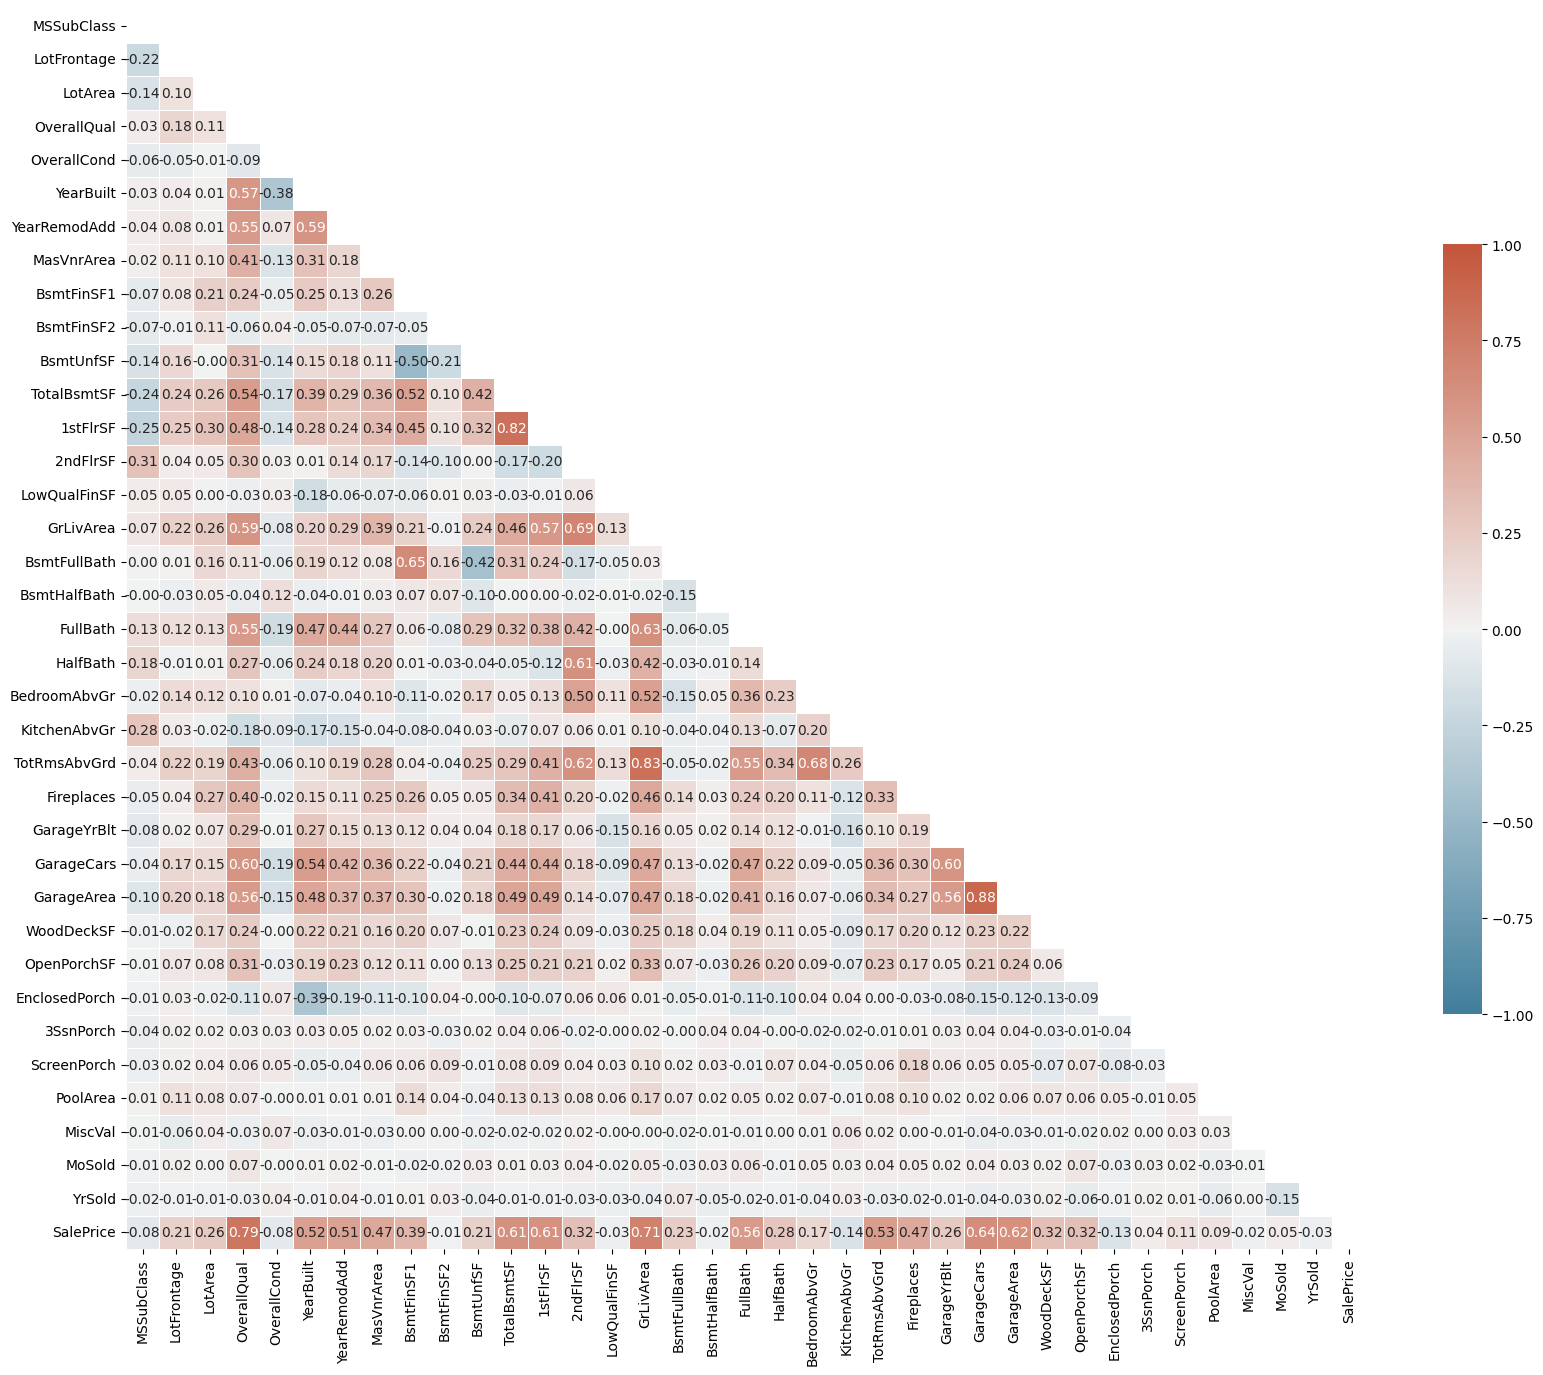

In [109]:
# vou checar logo a correlação das variáveis
# esse grafico e basicamente um heatmap, porem, ele nao mostra as correlacoes entre as proprias variaveis e nem as repetidas
# e uma forma resumida do heatmap 
# correlacao
corr = df_casas_num.corr()

# plotagem
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
# link da doc do gráfico
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html